# Simulation of toy model house

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/cghiaus/dm4bem_toy_model/HEAD?labpath=toy_model_house.ipynb)

This notebook presents the model from the chapter [Assembling thermal circuits](https://cghiaus.github.io/dm4bem_book/tutorials/pdREADME.html) of the Jupyter book [Dynamic Models for Building Energy Management](https://cghiaus.github.io/dm4bem_book/intro.html).

## Model

The model is presented in chapter [Toy model house](https://cghiaus.github.io/dm4bem_book/tutorials/02_2_0Toy.html). The dissaabled and assembled thermal circuits are presented in chapter [Assembling thermal circuits](https://cghiaus.github.io/dm4bem_book/tutorials/pdREADME.html).

![assambled_TC](./figures/01_cube_principle.svg)
> Figure 1. The toy model house:
> - 1 two-layer wall (consisting in 5 surfaces) and 1 glass window;
> - HVAC control system which acts as a proportional controller;
> - air infiltration and ventilation.

![disassambled_TC](./figures/thermal_circuit.svg)
> Figure 2. Four disassembled thermal circuits: wall_out, TC0, TC1, TC2, TC3.

![assambled_TC](./figures/03_ass_TC.svg)
> Figure 3. The assembling of the four circuits from Figure 2.

In [1]:
import toy_model_house

## Run with default values 

The default values for `simulation()` function are:

```python
def simulation(
        date_start='2000-01-01 12:00',
        date_end='2000-01-02 12:00',
        folder_bldg='bldg',
        file_weather='weather_data/FRA_Lyon.074810_IWEC.epw',
        imposed_time_step=0,
        numerical_integration_Euler=True,
        controller=True,
        indoor_air_capacity=False,
        glass_capacity=False,
        insulation_width_new=0.16,
        plot_with_pandas=False):


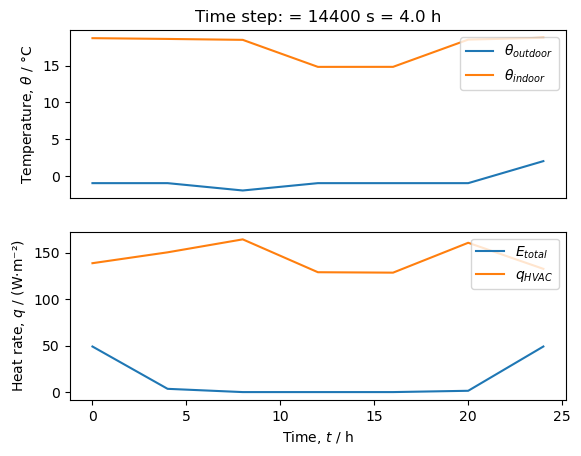

Time step: = 14400 s = 4.0 h
Mean outdoor temperature: -0.7 °C
Min. indoor temperature: 14.8 °C
Max. indoor temperature: 18.8 °C
Max. load: 164.2 W at 2000-01-01 20:00:00+01:00
Energy consumption for heating: 4.0 kWh
Energy consumption for cooling: 0.0 kWh

Duration of numerical integration: 0.005 s
Duration of simulation plot: 0.283 s


In [2]:
# Use default values
toy_model_house.simulation()

## Variable parameters

### Considering small capacities

If the small capacities (of air and of glass) are considered, the time step is reduced considerably.

The small capacities are (Figures 2 and 3):
- for air: capacity C in temperature node θ0 of thermal circuit c2: `TC['C']['c2_θ0']` ;
- for glass: capacity C in temperature node θ0 of thermal circuit c1: `TC['C']['c1_θ0']`.



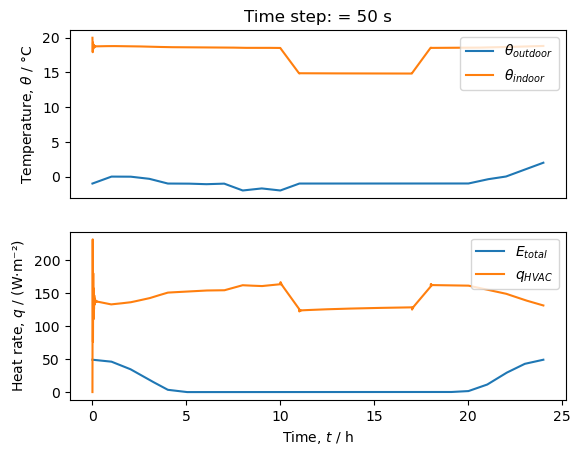

Time step: = 50 s
Mean outdoor temperature: -0.8 °C
Min. indoor temperature: 14.8 °C
Max. indoor temperature: 20.0 °C
Max. load: 231.3 W at 2000-01-01 12:00:50+01:00
Energy consumption for heating: 3.5 kWh
Energy consumption for cooling: 0.0 kWh

Duration of numerical integration: 1.232 s
Duration of simulation plot: 0.224 s


In [3]:
toy_model_house.simulation(
    indoor_air_capacity=True)

### Number of meshes in space discretisation

If the discretisation grid is small (ten meshes per layer instead of one mesh per layer, see `wall_types.csv` in folder `bldg2`), the time step is reduced.

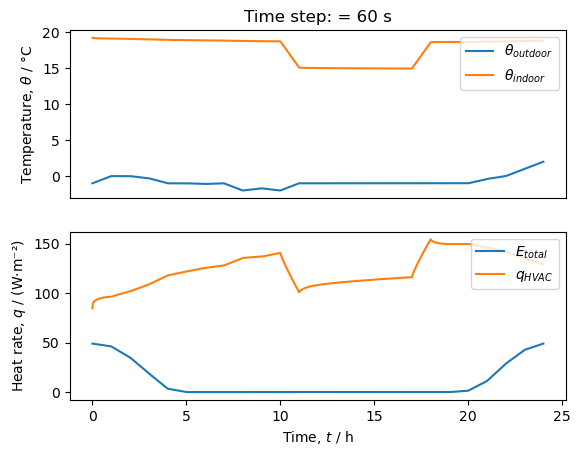

Time step: = 60 s
Mean outdoor temperature: -0.8 °C
Min. indoor temperature: 15.0 °C
Max. indoor temperature: 19.2 °C
Max. load: 154.4 W at 2000-01-02 06:00:00+01:00
Energy consumption for heating: 3.0 kWh
Energy consumption for cooling: 0.0 kWh

Duration of numerical integration: 1.197 s
Duration of simulation plot: 0.213 s


In [4]:
toy_model_house.simulation(
    folder_bldg='bldg2')

### Time step

The time step can be imposed in Euler explicit numerical integration.

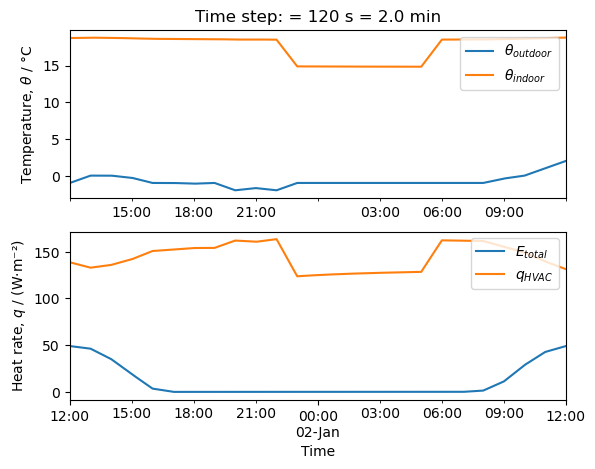

Time step: = 120 s = 2.0 min
Mean outdoor temperature: -0.8 °C
Min. indoor temperature: 14.8 °C
Max. indoor temperature: 18.8 °C
Max. load: 163.3 W at 2000-01-01 22:00:00+01:00
Energy consumption for heating: 3.5 kWh
Energy consumption for cooling: 0.0 kWh

Duration of numerical integration: 0.514 s
Duration of simulation plot: 0.293 s


In [8]:
toy_model_house.simulation(
        imposed_time_step=120,
        numerical_integration_Euler=True,
        plot_with_pandas = True)

### Plot with pandas or numpy

Plots with numpy show the time in days, hours, minutes or seconds, depending of the duration of simulation.

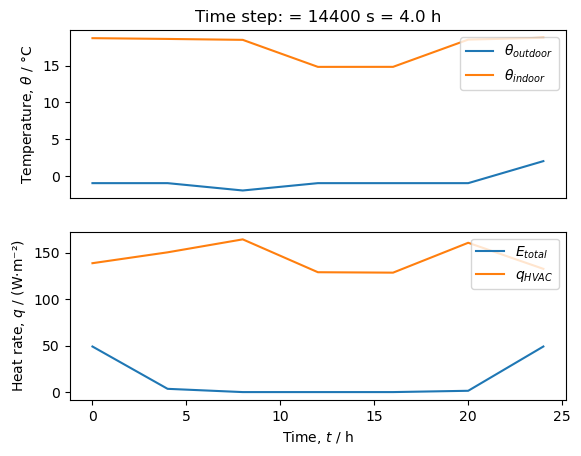

Time step: = 14400 s = 4.0 h
Mean outdoor temperature: -0.7 °C
Min. indoor temperature: 14.8 °C
Max. indoor temperature: 18.8 °C
Max. load: 164.2 W at 2000-01-01 20:00:00+01:00
Energy consumption for heating: 4.0 kWh
Energy consumption for cooling: 0.0 kWh

Duration of numerical integration: 0.007 s
Duration of simulation plot: 0.217 s


In [6]:
toy_model_house.simulation(
    plot_with_pandas=False)

Plots with pandas show the time of the year (month, day, hour), but it is slower.

Plots for a year can take one minute.

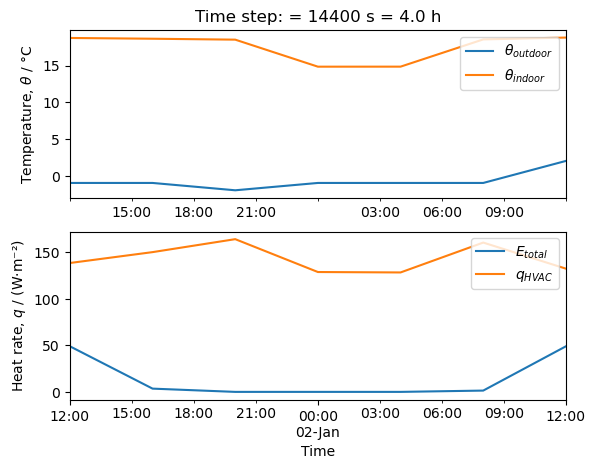

Time step: = 14400 s = 4.0 h
Mean outdoor temperature: -0.7 °C
Min. indoor temperature: 14.8 °C
Max. indoor temperature: 18.8 °C
Max. load: 164.2 W at 2000-01-01 20:00:00+01:00
Energy consumption for heating: 4.0 kWh
Energy consumption for cooling: 0.0 kWh

Duration of numerical integration: 0.007 s
Duration of simulation plot: 0.382 s


In [7]:
toy_model_house.simulation(
    plot_with_pandas=True)

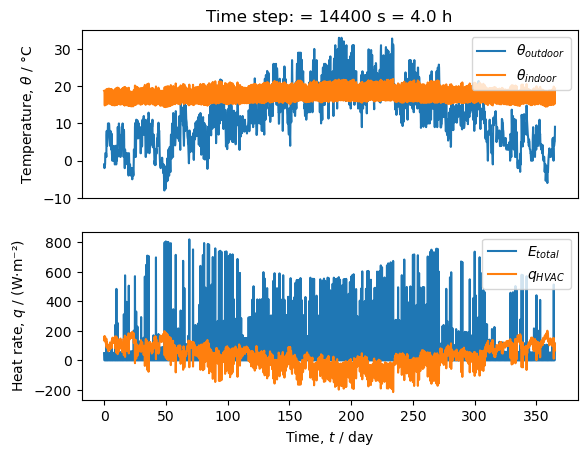

Time step: = 14400 s = 4.0 h
Mean outdoor temperature: 11.9 °C
Min. indoor temperature: 14.4 °C
Max. indoor temperature: 21.9 °C
Max. load: 200.8 W at 2000-12-25 08:00:00+01:00
Energy consumption for heating: 439.7 kWh
Energy consumption for cooling: -154.4 kWh

Duration of numerical integration: 1.593 s
Duration of simulation plot: 0.204 s


In [9]:
toy_model_house.simulation(
    date_start='2000-01-01 12:00',
    date_end='2000-12-31 12:00',
    plot_with_pandas=False)